In [2]:
import seaborn as sns
import pandas as pd
import sqlite3
import pandas as pd
import pickle


In [4]:
connection = sqlite3.connect('yelpHotelData.db')
x1 = connection.execute("select * FROM review")

In [37]:
df=pickle.load(open("save_modifieddatabase_trainData.pkl","rb"))

In [10]:
df.head()

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,hotelID,reviewLength,sentimentPolarity,sentimentSubjectivity
127551,3/5/2011,GJuWWC0mdQ8Ow0iIuwDWWg,sOzeK0dE0BYx4Mc8dmoenQ,Location: 5 stars Staff: 4 stars Food: 2 stars...,2,3,3,3,N,fH_VOJPlqBLYBak2wXtpLw,1249.0,0.248854,0.491878
681184,12/21/2010,JbsubHahTyej4cdzEsxwrQ,_Koj-hfPoUaNVNEmmj6ExA,"The Beauty Bar gets 4 stars for decor, bar ser...",3,2,0,0,Y,mWLFQ2d--AWQHEz_3_ffAw,593.0,0.075368,0.485091
296879,6/1/2008,CXrHK4wpr-A6_eyXRXE0nw,4DDlXwIxDLoxN6ZSmqETtw,Went here last night with some friends and saw...,5,1,2,0,Y,Q4rSAXQx2otN0LX2q1Y3jw,90.0,-0.025000,0.233333
125992,10/11/2008,kWQJXOF_KS7s2fDrAhQFiw,UOM1TCOUqT2UD19p-yxWLA,Don't buy the figure skater and mini shift dre...,2,0,0,0,N,b2zlq8Mp2UfSGmAgMWq9Xw,272.0,-0.021429,0.478571
272782,6/22/2012,t4DOZ5TaH2T9tKD1sx_bHw,OwUchEzH_wbPPhWNtiZyLQ,a good place - and art decio is the reason i h...,4,0,0,0,N,6dmbJ47fBhG8uNx8kqnMow,151.0,0.400000,0.566667


## Finding the count of Fake/Spam and Non-Spam or Genuine reviews on Train Data

In [11]:
print(df['flagged'].value_counts())
print(len(df))

N    336828
Y    213835
Name: flagged, dtype: int64
550663


## Loading the Pickle file of Preprocessed Data

In [3]:
df_raw = pickle.load(open("../save_modifieddatabase_trainData.pkl", "rb"))

In [5]:
df_raw = df_raw['reviewContent']

In [6]:
df_raw.head()

127551    Location: 5 stars Staff: 4 stars Food: 2 stars...
681184    The Beauty Bar gets 4 stars for decor, bar ser...
296879    Went here last night with some friends and saw...
125992    Don't buy the figure skater and mini shift dre...
272782    a good place - and art decio is the reason i h...
Name: reviewContent, dtype: object

## Most Frequent Words before Text Cleaning

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from nltk import FreqDist

def get_frequent_words(x, terms=100):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  return d

In [10]:
plotData = get_frequent_words(df_raw)

In [12]:
# function to plot top n most frequent words
def freq_words(d):
  d = d.nlargest(columns="count", n=30)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

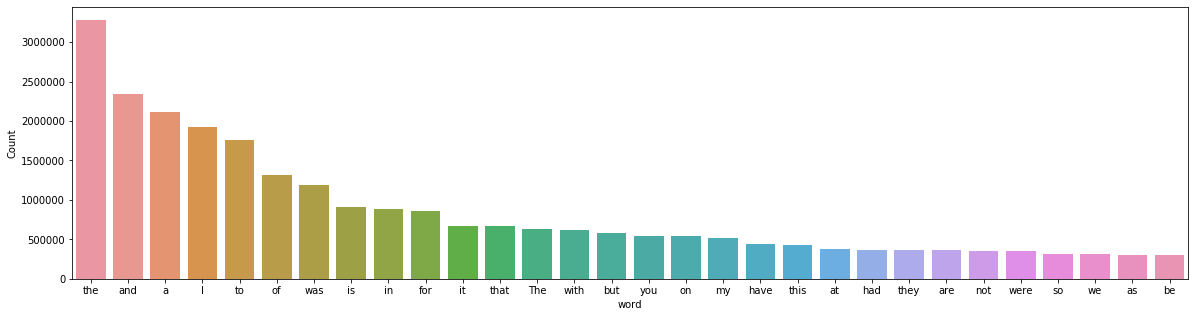

In [21]:
freq_words(plotData)

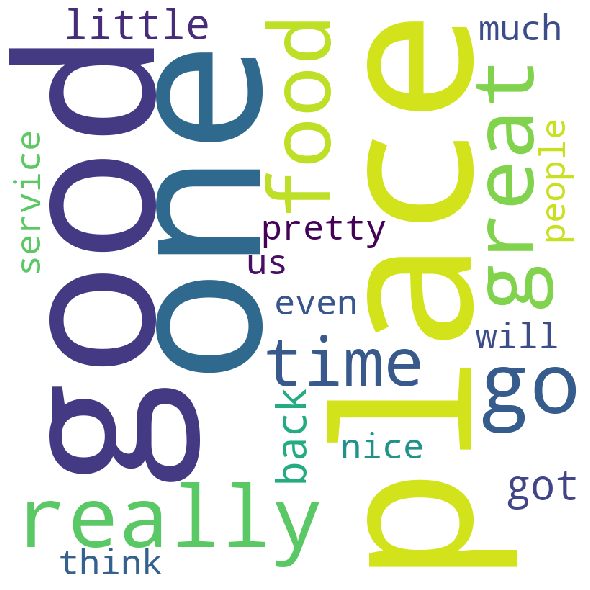

In [27]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(' '.join(plotData['word'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

## Loading the Pickle file of Preprocessed Cleaned Data

In [17]:
df_token = pickle.load(open( "save_preprocessLemmatize_trainData.pkl", "rb" ) )

### Most Frequent Words after Text Cleaning

In [14]:
# from nltk import FreqDist

# def get_frequent_words(x, terms=100):
#   all_words = ' '.join([text for text in x])
#   all_words = all_words.split()
  
#   fdist = FreqDist(all_words)
#   words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
#   # selecting top n most frequent words
#   d = words_df.nlargest(columns="count", n = terms) 
#   return d

In [18]:
plotData_cleaned = get_frequent_words(df_token['cleanedToken'])

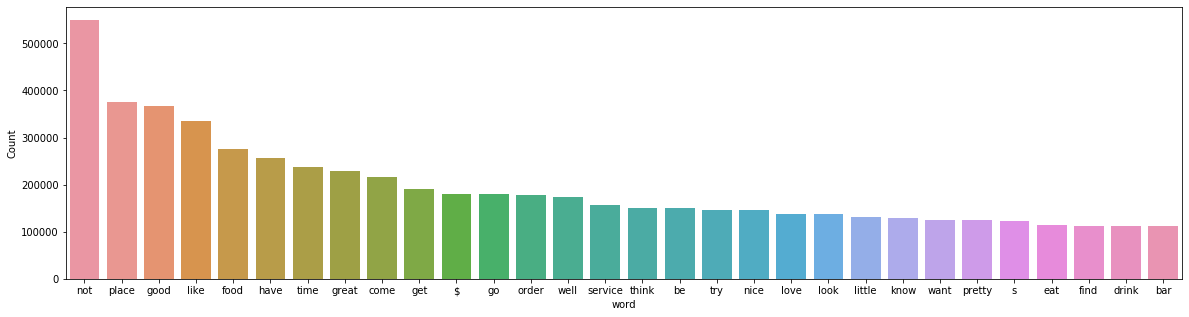

In [20]:
# # function to plot top n most frequent words
# def freq_words(d):
#   d = d.nlargest(columns="count", n=30)
#   plt.figure(figsize=(20,5))
#   ax = sns.barplot(data=d, x= "word", y = "count")
#   ax.set(ylabel = 'Count')
#   plt.show()
freq_words(plotData_cleaned)


### WordCloud for the most frequent words after Text Cleaning

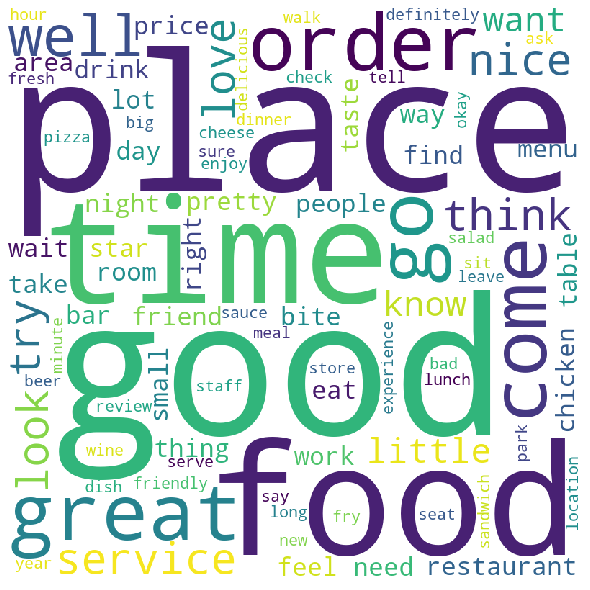

In [28]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(plotData_cleaned['word'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### HeatMap for Non Spam Reviews groupped by Ratings

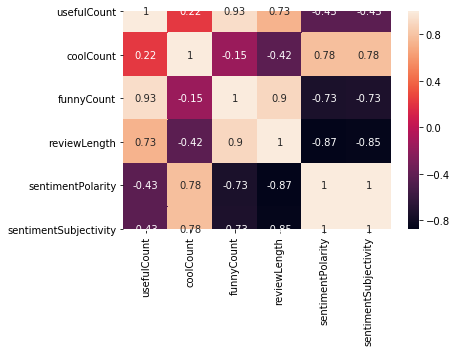

In [20]:
flagged = df.loc[df['flagged'] == 'N'].groupby('rating').mean()
#flagged = df.loc[df['Target'] == 0]
sns.heatmap(data=flagged.corr(), annot=True)

### HeatMap for Spam Reviews groupped by Ratings


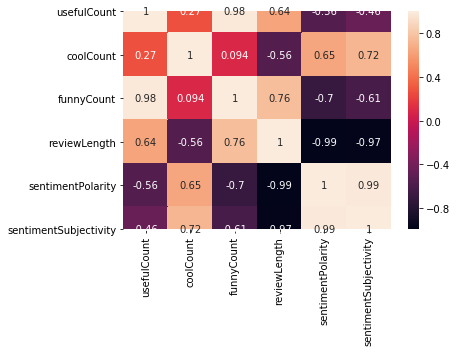

In [21]:
flagged = df.loc[df['flagged'] == 'Y'].groupby('rating').mean()
#flagged = df.loc[df['Target'] == 0]
sns.heatmap(data=flagged.corr(), annot=True)